In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Importing dataset variables for Black and Scholes Model


In [25]:
import pandas as pd

data = pd.read_csv('../../Data/full_data.csv',low_memory=False)

bs_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
    'ticker'
]


bs_data = data[bs_variables]

In [26]:
call_data = bs_data[bs_data['call'] == 1]
put_data = bs_data[bs_data['call'] == 0]

call_data = call_data.drop(columns=['call'])
put_data = put_data.drop(columns=['call'])

# Compute the BS  model for all the options

In [ ]:
def black_scholes_call(row):
    
    S = row['stock']
    K = row['strike']
    tau = row['tau']
    r = 0.0425
    sigma = row['sigma']
    
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

    return call_price

def black_scholes_put(row):
    
    S = row['stock']
    K = row['strike']
    tau = row['tau']
    r = 0.0425
    sigma = row['sigma']
    

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    put_price = K * np.exp(-r * tau) * norm.cdf(-d2) - S *norm.cdf(-d1)

    return put_price


call_data['BS'] = bs_data.apply(black_scholes_call, axis=1)
call_data['BS'] = bs_data.apply(black_scholes_put, axis=1)

# Evaluating performance for call options

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
call_mse = mean_squared_error(call_data['price'], call_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
call_rmse = np.sqrt(call_mse)

# Calculate Mean Absolute Error (MAE)
call_mae = mean_absolute_error(call_data['price'], call_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
call_mape = np.mean(np.abs((call_data['price'] - call_data['BS']) / call_data['price'])) * 100

# Calculate R-squared
call_r_squared = r2_score(call_data['price'], call_data['BS'])

print("Mean Squared Error (MSE):", call_mse)
print("Root Mean Squared Error (RMSE):", call_rmse)
print("Mean Absolute Error (MAE):", call_mae)
print("Mean Absolute Percentage Error (MAPE):", call_mape)
print("R-squared:", call_r_squared)


Mean Squared Error (MSE): 805.0210906414076
Root Mean Squared Error (RMSE): 28.372893589505594
Mean Absolute Error (MAE): 5.022129009974637
Mean Absolute Percentage Error (MAPE): 272.7393829311862
R-squared: 0.8712693131695832


# Evaluating performance for put option

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
put_mse = mean_squared_error(call_data['price'], call_data['BS'])

# Calculate Root Mean Squared Error (RMSE)
put_rmse = np.sqrt(put_mse)

# Calculate Mean Absolute Error (MAE)
put_mae = mean_absolute_error(put_data['price'], put_data['BS'])

# Calculate Mean Absolute Percentage Error (MAPE)
put_mape = np.mean(np.abs((put_data['price'] - put_data['BS']) / put_data['price'])) * 100

# Calculate R-squared
put_r_squared = r2_score(put_data['price'], put_data['BS'])

print("Mean Squared Error (MSE):", put_mse)
print("Root Mean Squared Error (RMSE):", put_rmse)
print("Mean Absolute Error (MAE):", put_mae)
print("Mean Absolute Percentage Error (MAPE):", put_mape)
print("R-squared:", put_r_squared)


Mean Squared Error (MSE): 437.7224503393249
Root Mean Squared Error (RMSE): 20.921817567776586
Mean Absolute Error (MAE): 3.6028231917472593
Mean Absolute Percentage Error (MAPE): 411.26385803928764
R-squared: 0.7289459236315208


### Checking option conformity

In [42]:
call_data['Cond 1'] = call_data.BS >= 0
call_data['Cond 2'] = call_data.BS < call_data.stock 
call_data['Cond 3'] = call_data.BS > call_data.stock - call_data.strike * np.exp((-0.0425) * call_data.tau)

put_data['Cond 1'] = put_data.BS >= 0
put_data['Cond 2'] =  put_data.BS <= put_data.strike
put_data['Cond 3'] = put_data.BS >  put_data.strike * np.exp((-0.0425) * put_data.tau) - put_data.stock 

consition_column = ['Cond 1','Cond 2','Cond 3']

In [38]:
anomalies_call = call_data[consition_column].apply(lambda col: col.value_counts().get(False,0))
anomalies_call

Cond 1       0
Cond 2       0
Cond 3    1008
dtype: int64

In [43]:
anomalies_put = put_data[consition_column].apply(lambda col: col.value_counts().get(False,0))
anomalies_put

Cond 1      0
Cond 2      0
Cond 3    304
dtype: int64

# Graphic visualization of results

### Call option

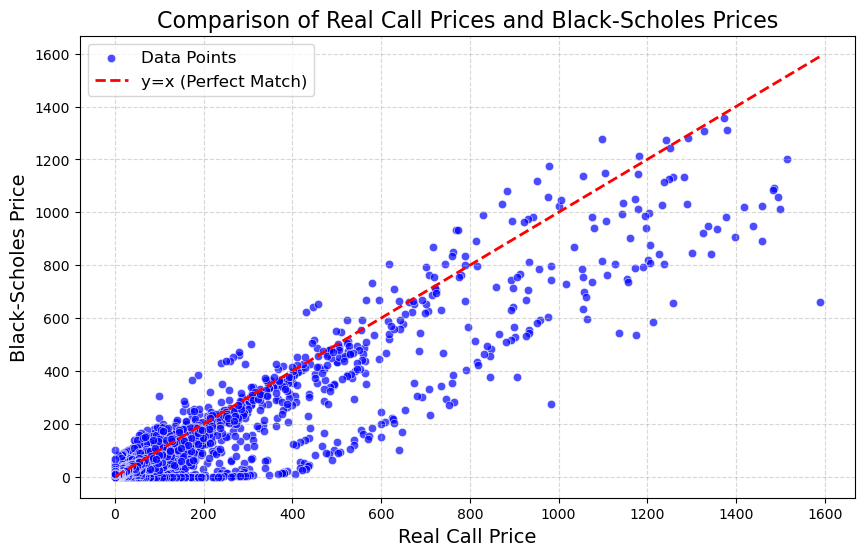

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=call_data['price'], y=call_data['BS'], color='blue', alpha=0.7, label='Data Points')
plt.plot([call_data['price'].min(), call_data['price'].max()], [call_data['price'].min(), call_data['price'].max()],
         color='red', linestyle='--', linewidth=2, label='y=x (Perfect Match)')

plt.title('Comparison of Real Call Prices and Black-Scholes Prices', fontsize=16)
plt.xlabel('Real Call Price', fontsize=14)
plt.ylabel('Black-Scholes Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.savefig('scatter_comparison_call.png', dpi=300, bbox_inches='tight')
plt.show()

### Put option

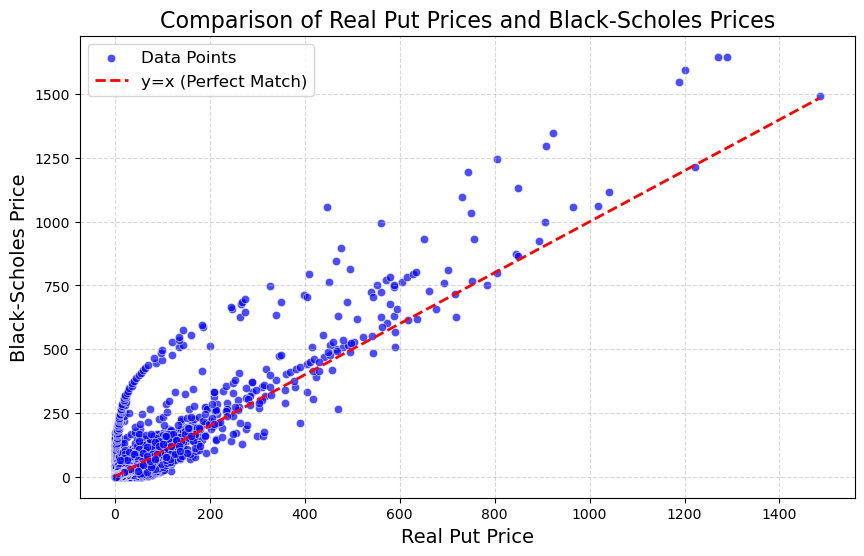

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=put_data['price'], y=put_data['BS'], color='blue', alpha=0.7, label='Data Points')
plt.plot([put_data['price'].min(), put_data['price'].max()], [put_data['price'].min(), put_data['price'].max()],
         color='red', linestyle='--', linewidth=2, label='y=x (Perfect Match)')

plt.title('Comparison of Real Put Prices and Black-Scholes Prices', fontsize=16)
plt.xlabel('Real Put Price', fontsize=14)
plt.ylabel('Black-Scholes Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.savefig('scatter_comparison_put.png', dpi=300, bbox_inches='tight')
plt.show()